In [2]:
!python --version

Python 3.7.10


HOW TO INSTALL PYSPARK ON COLAB


In [3]:

!pwd

!wget https://mirrors.estointernet.in/apache/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz

/content
--2021-05-12 07:30:21--  https://mirrors.estointernet.in/apache/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
Resolving mirrors.estointernet.in (mirrors.estointernet.in)... 43.255.166.254, 2403:8940:3:1::f
Connecting to mirrors.estointernet.in (mirrors.estointernet.in)|43.255.166.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220488957 (210M) [application/octet-stream]
Saving to: ‘spark-3.0.2-bin-hadoop2.7.tgz’

spark-3.0.2-bin-had 100%[===================>] 210.27M  6.08MB/s    in 36s     

2021-05-12 07:30:57 (5.87 MB/s) - ‘spark-3.0.2-bin-hadoop2.7.tgz’ saved [220488957/220488957]



In [4]:
!tar -xvzf spark-3.0.2-bin-hadoop2.7.tgz

spark-3.0.2-bin-hadoop2.7/
spark-3.0.2-bin-hadoop2.7/R/
spark-3.0.2-bin-hadoop2.7/R/lib/
spark-3.0.2-bin-hadoop2.7/R/lib/sparkr.zip
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/worker/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/tests/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/profile/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/profile/shell.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/profile/general.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/index.html
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.0.2-

In [5]:
!ls /content/spark-3.0.2-bin-hadoop2.7

!pip install findspark

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


**TO SET SPARK ENVIORMNMENT ON GOOGLE COLAB**

In [7]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"


import findspark
findspark.init()

**HOW TO CREATE A SPARK SESSION**

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Pyspark 3.0 on Google colab").getOrCreate()

**HOW TO READ A CSV FILE**

In [ ]:
df = spark.read.csv("/content/data/transaction_detail.csv")

df.show(3)

+------------------+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+
|               _c0|                 _c1|                 _c2|                 _c3|                 _c4|           _c5|                 _c6|                 _c7|
+------------------+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+
|transaction_amount|transaction_card_...|transaction_ecomm...|transaction_count...|transaction_datetime|transaction_id|transaction_city_...|transaction_produ...|
|             50.85|          MasterCard|        www.ebay.com|               India| 2019-05-14 15:24:12|             1|              Mumbai|              Laptop|
|            259.12|          MasterCard|      www.amazon.com|               India| 2019-05-14 15:24:13|             2|                Pune|          Wrist Band|
+------------------+--------

In [ ]:
df = spark.read.csv(header=True, inferSchema=True,path ="/content/data/transaction_detail.csv")

df.printSchema()

df.show(4)

root
 |-- transaction_amount: double (nullable = true)
 |-- transaction_card_type: string (nullable = true)
 |-- transaction_ecommerce_website_name: string (nullable = true)
 |-- transaction_country_name: string (nullable = true)
 |-- transaction_datetime: string (nullable = true)
 |-- transaction_id: integer (nullable = true)
 |-- transaction_city_name: string (nullable = true)
 |-- transaction_product_name: string (nullable = true)

+------------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+
|transaction_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|
+------------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+
|  

**COUNT NO. OF RECORDS**


In [ ]:
records = df.count()

print("recors_count:" + str(records))

recors_count:1000


**CREATE FIRST DATAFRAME**

**OPTION 1**

Notes:

HOW TO CREATE YOUR SCHEMA FOR YOUR DATAFRAME

Here true is for nullable which means that a value can be null

In [ ]:
users_list_0 = ["1|John|London", "2|Martin|New York", "3|Sam|Sydney", "4|Alan|Mexico City", "5|Jacob|Florida"]
print(users_list_0)

users_list_0_rdd = spark.sparkContext.parallelize(users_list_0)

users_list_0_rdd = users_list_0_rdd.map(lambda ele: (int(ele.split('|')[0]), ele.split('|')[1], ele.split('|')[2]))

users_df_0 = spark.createDataFrame(users_list_0_rdd)
users_df_0.show(10)
users_df_0.printSchema()

from pyspark.sql.types import StructType, StructField, IntegerType, StringType 

users_schema = StructType([
                          StructField("id", IntegerType(), True),               
                          StructField("name", StringType(), True),
                          StructField("city", StringType(), True)])

users_df_01 = spark.createDataFrame(users_list_0_rdd, schema=users_schema)
users_df_01.show(10)
users_df_01.printSchema()

['1|John|London', '2|Martin|New York', '3|Sam|Sydney', '4|Alan|Mexico City', '5|Jacob|Florida']
+---+------+-----------+
| _1|    _2|         _3|
+---+------+-----------+
|  1|  John|     London|
|  2|Martin|   New York|
|  3|   Sam|     Sydney|
|  4|  Alan|Mexico City|
|  5| Jacob|    Florida|
+---+------+-----------+

root
 |-- _1: long (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)

+---+------+-----------+
| id|  name|       city|
+---+------+-----------+
|  1|  John|     London|
|  2|Martin|   New York|
|  3|   Sam|     Sydney|
|  4|  Alan|Mexico City|
|  5| Jacob|    Florida|
+---+------+-----------+

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)



**OPTIONS 2**

How to create  a list of tuples into dataframe

In [ ]:
users_list_1 = [(1, "John", "London"), (2, "Martin", "New York"), (3, "Sam", "Sydney"), (4, "Alan", "Mexico City"), (5, "Jacob", "Florida")]
print(users_list_1)

users_df_1 = spark.createDataFrame(users_list_1)
users_df_1.show(10)
users_df_1.printSchema()

from pyspark.sql.types import StructType, StructField, IntegerType, StringType

users_schema = StructType([
                          StructField("id", IntegerType(), True),
                          StructField("name", StringType(), True),
                          StructField("city", StringType(), True)])

users_df_11 = spark.createDataFrame(users_list_1, schema=users_schema)
users_df_11.show(10)
users_df_11.printSchema()

[(1, 'John', 'London'), (2, 'Martin', 'New York'), (3, 'Sam', 'Sydney'), (4, 'Alan', 'Mexico City'), (5, 'Jacob', 'Florida')]
+---+------+-----------+
| _1|    _2|         _3|
+---+------+-----------+
|  1|  John|     London|
|  2|Martin|   New York|
|  3|   Sam|     Sydney|
|  4|  Alan|Mexico City|
|  5| Jacob|    Florida|
+---+------+-----------+

root
 |-- _1: long (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)

+---+------+-----------+
| id|  name|       city|
+---+------+-----------+
|  1|  John|     London|
|  2|Martin|   New York|
|  3|   Sam|     Sydney|
|  4|  Alan|Mexico City|
|  5| Jacob|    Florida|
+---+------+-----------+

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)



**OPTION 3**

Create a dataframe using row object

In [ ]:
from pyspark.sql import Row

users_list_2 = [Row(1, "John", "London"), Row(2, "Martin", "New York"), Row(3, "Sam", "Sydney"), Row(4, "Alan", "Mexico City"), Row(5, "Jacob", "Florida")]
print(users_list_2)

users_df_2 = spark.createDataFrame(users_list_2)
users_df_2.show(10)
users_df_2.printSchema()

users_df_21 = spark.createDataFrame(users_list_2, schema=users_schema)
users_df_21.show(10)
users_df_21.printSchema()

[<Row(1, 'John', 'London')>, <Row(2, 'Martin', 'New York')>, <Row(3, 'Sam', 'Sydney')>, <Row(4, 'Alan', 'Mexico City')>, <Row(5, 'Jacob', 'Florida')>]
+---+------+-----------+
| _1|    _2|         _3|
+---+------+-----------+
|  1|  John|     London|
|  2|Martin|   New York|
|  3|   Sam|     Sydney|
|  4|  Alan|Mexico City|
|  5| Jacob|    Florida|
+---+------+-----------+

root
 |-- _1: long (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)

+---+------+-----------+
| id|  name|       city|
+---+------+-----------+
|  1|  John|     London|
|  2|Martin|   New York|
|  3|   Sam|     Sydney|
|  4|  Alan|Mexico City|
|  5| Jacob|    Florida|
+---+------+-----------+

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)



**OPTION 4** 

Create a data frame from list of dictionaries

In [ ]:
users_list_3 = [{"id": 1, "name": "John", "city": "London"}, 
                {"id": 2, "name": "Martin", "city": "New York"}, 
                {"id": 3, "name": "Sam", "city": "Sydney"}, 
                {"id": 4, "name": "Alan", "city": "Mexico City"}, 
                {"id": 5, "name": "Jacob", "city": "Florida"}]
print(users_list_3)

users_df_3 = spark.createDataFrame(users_list_3)
users_df_3.show(10)
users_df_3.printSchema()

users_df_31 = spark.createDataFrame(users_list_3, schema=users_schema)
users_df_31.show(10)
users_df_31.printSchema()

[{'id': 1, 'name': 'John', 'city': 'London'}, {'id': 2, 'name': 'Martin', 'city': 'New York'}, {'id': 3, 'name': 'Sam', 'city': 'Sydney'}, {'id': 4, 'name': 'Alan', 'city': 'Mexico City'}, {'id': 5, 'name': 'Jacob', 'city': 'Florida'}]


/content/spark-3.0.2-bin-hadoop2.7/python/pyspark/sql/session.py:381: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----------+---+------+
|       city| id|  name|
+-----------+---+------+
|     London|  1|  John|
|   New York|  2|Martin|
|     Sydney|  3|   Sam|
|Mexico City|  4|  Alan|
|    Florida|  5| Jacob|
+-----------+---+------+

root
 |-- city: string (nullable = true)
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)

+---+------+-----------+
| id|  name|       city|
+---+------+-----------+
|  1|  John|     London|
|  2|Martin|   New York|
|  3|   Sam|     Sydney|
|  4|  Alan|Mexico City|
|  5| Jacob|    Florida|
+---+------+-----------+

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)



**CREATE A DATAFRAME FROM CSV File**

In [ ]:
csv_file_path = "/content/data/user_detail_comma_delimiter.csv"

df = spark.read.csv(csv_file_path)

df.show()

df.printSchema()

+-------+---------+-----------+
|    _c0|      _c1|        _c2|
+-------+---------+-----------+
|user_id|user_name|  user_city|
|      1|     John|     London|
|      2|   Martin|   New York|
|      3|      Sam|     Sydney|
|      4|     Alan|Mexico City|
|      5|    Jacob|    Florida|
+-------+---------+-----------+

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)



header = True means that this dataset has header(Column name)

In [ ]:
csv_file_path = "/content/data/user_detail_comma_delimiter.csv"

df = spark.read.csv(csv_file_path, sep=",", header=True)

df.show()

df.printSchema()

+-------+---------+-----------+
|user_id|user_name|  user_city|
+-------+---------+-----------+
|      1|     John|     London|
|      2|   Martin|   New York|
|      3|      Sam|     Sydney|
|      4|     Alan|Mexico City|
|      5|    Jacob|    Florida|
+-------+---------+-----------+

root
 |-- user_id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_city: string (nullable = true)



The below used csv file has |(pipe) as seperator


In [ ]:
csv_file_path = "/content/data/user_detail_pipe_delimiter.csv"

df = spark.read.csv(path=csv_file_path, sep="|", header=True, inferSchema=True)

df.show()

df.printSchema()

+-------+---------+-----------+
|user_id|user_name|  user_city|
+-------+---------+-----------+
|      1|     John|     London|
|      2|   Martin|   New York|
|      3|      Sam|     Sydney|
|      4|     Alan|Mexico City|
|      5|    Jacob|    Florida|
+-------+---------+-----------+

root
 |-- user_id: integer (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_city: string (nullable = true)



Creating with Schema

In [ ]:
csv_file_path = "/content/data/user_detail_pipe_delimiter.csv"

from pyspark.sql.types import *

user_schema = StructType([
                          StructField("user_id", IntegerType(),True),
                          StructField("user_name", StringType(), True),
                          StructField("user_city", StringType(), True)
])

df = spark.read.csv(path=csv_file_path, sep="|", header=True, inferSchema=True)

df.show()

df.printSchema()

+-------+---------+-----------+
|user_id|user_name|  user_city|
+-------+---------+-----------+
|      1|     John|     London|
|      2|   Martin|   New York|
|      3|      Sam|     Sydney|
|      4|     Alan|Mexico City|
|      5|    Jacob|    Florida|
+-------+---------+-----------+

root
 |-- user_id: integer (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_city: string (nullable = true)



In [ ]:
csv_file_path = "/content/data/user_detail_pipe_delimiter.csv"

from pyspark.sql.types import *

user_schema = StructType([
                          StructField("user_id", IntegerType(),True),
                          StructField("user_name", StringType(), True),
                          StructField("user_city", StringType(), True)
])

df = spark.read.csv(path=csv_file_path, sep="|", header=True, schema=user_schema)

df.show()

df.printSchema()

+-------+---------+-----------+
|user_id|user_name|  user_city|
+-------+---------+-----------+
|      1|     John|     London|
|      2|   Martin|   New York|
|      3|      Sam|     Sydney|
|      4|     Alan|Mexico City|
|      5|    Jacob|    Florida|
+-------+---------+-----------+

root
 |-- user_id: integer (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_city: string (nullable = true)



**CREATE DATAFRAME FROM JSON FILE**

In [ ]:
json_file_path = "data/user_detail.json"

df = spark.read.json(path=json_file_path)

df.show()

+-----------+-------+---------+
|  user_city|user_id|user_name|
+-----------+-------+---------+
|     London|      1|     John|
|   New York|      2|   Martin|
|     Sydney|      3|      Sam|
|Mexico City|      4|     Alan|
|    Florida|      5|    Jacob|
+-----------+-------+---------+



If Json file is in multiline format

In [ ]:
json_file_path = "data/user_detail_multiline.json"

df = spark.read.json(path=json_file_path,multiLine=True)

df.show()

+---------+-------+---------+
|user_city|user_id|user_name|
+---------+-------+---------+
|   London|      1|     John|
+---------+-------+---------+



Correct way for multiline json file

In [ ]:
json_file_path = "data/user_detail_multiline_in_list.json"

df = spark.read.json(path=json_file_path,multiLine=True)

df.show()

+-----------+-------+---------+
|  user_city|user_id|user_name|
+-----------+-------+---------+
|     London|      1|     John|
|   New York|      2|   Martin|
|     Sydney|      3|      Sam|
|Mexico City|      4|     Alan|
|    Florida|      5|    Jacob|
+-----------+-------+---------+



JSON WITH SCHEMA

In [ ]:
json_file_path_3 = "/content/data/user_detail_multiline_in_list.json"

df = spark.read.json(path=json_file_path_3, multiLine=True)

df.show()

print("With schema option")

df = spark.read.json(path=json_file_path_3, multiLine=True, schema=user_schema)

df.show(100, False)

+-----------+-------+---------+
|  user_city|user_id|user_name|
+-----------+-------+---------+
|     London|      1|     John|
|   New York|      2|   Martin|
|     Sydney|      3|      Sam|
|Mexico City|      4|     Alan|
|    Florida|      5|    Jacob|
+-----------+-------+---------+

With schema option
+-------+---------+-----------+
|user_id|user_name|user_city  |
+-------+---------+-----------+
|1      |John     |London     |
|2      |Martin   |New York   |
|3      |Sam      |Sydney     |
|4      |Alan     |Mexico City|
|5      |Jacob    |Florida    |
+-------+---------+-----------+



CREATE A DATAFRAME FROM NESTED JSON FILE

In [ ]:
nested_json_file_path = "/content/data/sample_nested_json_file.json"

df = spark.read.json(path=nested_json_file_path, multiLine=True)

df.show(10, False)

df.printSchema()

df.select(['CHECK.Check1', 'CHECK.Check2', 'COL', 'DATA', 'IFAM', 'KTM']).show(100, False)

+--------+---+--------------------------------------------------------+----+-------------+
|CHECK   |COL|DATA                                                    |IFAM|KTM          |
+--------+---+--------------------------------------------------------+----+-------------+
|[1, TWO]|21 |[[[[k1, v1], [k2, v2]], 31], [[[k3, v3], [k4, v4]], 33]]|EQR |1548176931466|
+--------+---+--------------------------------------------------------+----+-------------+

root
 |-- CHECK: struct (nullable = true)
 |    |-- Check1: long (nullable = true)
 |    |-- Check2: string (nullable = true)
 |-- COL: long (nullable = true)
 |-- DATA: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- Crate: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- key: string (nullable = true)
 |    |    |    |    |-- value: string (nullable = true)
 |    |    |-- MLrate: string (nullable = true)
 |-- IFAM: string (nullable = true)
 |

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

def read_nested_json(df):
    column_list = []

    for column_name in df.schema.names:
        print("Outside isinstance loop: " + column_name)
        # Checking column type is ArrayType
        if isinstance(df.schema[column_name].dataType, ArrayType):
            print("Inside isinstance loop of ArrayType: " + column_name)
            df = df.withColumn(column_name, explode(column_name).alias(column_name))
            column_list.append(column_name)

        elif isinstance(df.schema[column_name].dataType, StructType):
            print("Inside isinstance loop of StructType: " + column_name)
            for field in df.schema[column_name].dataType.fields:
                column_list.append(col(column_name + "." + field.name).alias(column_name + "_" + field.name))
        else:
            column_list.append(column_name)

    # Selecting columns using column_list from dataframe: df
    df = df.select(column_list)
    return df

read_nested_json_flag = True

while read_nested_json_flag:
  print("Reading Nested JSON File ... ")
  df = read_nested_json(df)
  df.show(100, False)
  read_nested_json_flag = False

  for column_name in df.schema.names:
    if isinstance(df.schema[column_name].dataType, ArrayType):
      read_nested_json_flag = True
    elif isinstance(df.schema[column_name].dataType, StructType):
      read_nested_json_flag = True

df.show(100, False)

Reading Nested JSON File ... 
Outside isinstance loop: CHECK
Inside isinstance loop of StructType: CHECK
Outside isinstance loop: COL
Outside isinstance loop: DATA
Inside isinstance loop of ArrayType: DATA
Outside isinstance loop: IFAM
Outside isinstance loop: KTM
+------------+------------+---+--------------------------+----+-------------+
|CHECK_Check1|CHECK_Check2|COL|DATA                      |IFAM|KTM          |
+------------+------------+---+--------------------------+----+-------------+
|1           |TWO         |21 |[[[k1, v1], [k2, v2]], 31]|EQR |1548176931466|
|1           |TWO         |21 |[[[k3, v3], [k4, v4]], 33]|EQR |1548176931466|
+------------+------------+---+--------------------------+----+-------------+

Reading Nested JSON File ... 
Outside isinstance loop: CHECK_Check1
Outside isinstance loop: CHECK_Check2
Outside isinstance loop: COL
Outside isinstance loop: DATA
Inside isinstance loop of StructType: DATA
Outside isinstance loop: IFAM
Outside isinstance loop: KTM

**SPARKSQL**

In [15]:
df = spark.read.csv(header=True, inferSchema=True,path ="/content/DATA/transaction_detail.csv")
df.printSchema()
df.take(5)

root
 |-- transaction_amount: double (nullable = true)
 |-- transaction_card_type: string (nullable = true)
 |-- transaction_ecommerce_website_name: string (nullable = true)
 |-- transaction_country_name: string (nullable = true)
 |-- transaction_datetime: string (nullable = true)
 |-- transaction_id: integer (nullable = true)
 |-- transaction_city_name: string (nullable = true)
 |-- transaction_product_name: string (nullable = true)



[Row(transaction_amount=50.85, transaction_card_type='MasterCard', transaction_ecommerce_website_name='www.ebay.com', transaction_country_name='India', transaction_datetime='2019-05-14 15:24:12', transaction_id=1, transaction_city_name='Mumbai', transaction_product_name='Laptop'),
 Row(transaction_amount=259.12, transaction_card_type='MasterCard', transaction_ecommerce_website_name='www.amazon.com', transaction_country_name='India', transaction_datetime='2019-05-14 15:24:13', transaction_id=2, transaction_city_name='Pune', transaction_product_name='Wrist Band'),
 Row(transaction_amount=328.16, transaction_card_type='MasterCard', transaction_ecommerce_website_name='www.flipkart.com', transaction_country_name='United States', transaction_datetime='2019-05-14 15:24:14', transaction_id=3, transaction_city_name='New York City', transaction_product_name='TV Stand'),
 Row(transaction_amount=399.06, transaction_card_type='Visa', transaction_ecommerce_website_name='www.snapdeal.com', transactio

**RENAME A COLUMN**

In [19]:
df = df.withColumnRenamed("transaction_amount","trans_amount")

In [20]:
df.printSchema()

root
 |-- trans_amount: double (nullable = true)
 |-- transaction_card_type: string (nullable = true)
 |-- transaction_ecommerce_website_name: string (nullable = true)
 |-- transaction_country_name: string (nullable = true)
 |-- transaction_datetime: string (nullable = true)
 |-- transaction_id: integer (nullable = true)
 |-- transaction_city_name: string (nullable = true)
 |-- transaction_product_name: string (nullable = true)



**ADD NEW COLUMN**

In [21]:
from pyspark.sql.functions import col
df = df.withColumn("trans_Amount_withtax",col("trans_amount")*2)
df.show(5)

+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|trans_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|trans_Amount_withtax|
+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|       50.85|           MasterCard|                      www.ebay.com|                   India| 2019-05-14 15:24:12|             1|               Mumbai|                  Laptop|               101.7|
|      259.12|           MasterCard|                    www.amazon.com|                   India| 2019-05-14 15:24:13|             2|                 Pune|              Wrist Band|              518

**Filter()**

In [22]:
df_1 = df.filter(df.trans_Amount_withtax > 500)
df_1.show(5)

+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|trans_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|trans_Amount_withtax|
+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|      259.12|           MasterCard|                    www.amazon.com|                   India| 2019-05-14 15:24:13|             2|                 Pune|              Wrist Band|              518.24|
|      328.16|           MasterCard|                  www.flipkart.com|           United States| 2019-05-14 15:24:14|             3|        New York City|                TV Stand|              656

**Sorting**

In [23]:
df_1.sort(df_1.trans_Amount_withtax)
df_1.show(5)

+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|trans_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|trans_Amount_withtax|
+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|      259.12|           MasterCard|                    www.amazon.com|                   India| 2019-05-14 15:24:13|             2|                 Pune|              Wrist Band|              518.24|
|      328.16|           MasterCard|                  www.flipkart.com|           United States| 2019-05-14 15:24:14|             3|        New York City|                TV Stand|              656

In [24]:
df_1.sort(df_1.trans_Amount_withtax.desc())
df_1.show(5)

+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|trans_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|trans_Amount_withtax|
+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|      259.12|           MasterCard|                    www.amazon.com|                   India| 2019-05-14 15:24:13|             2|                 Pune|              Wrist Band|              518.24|
|      328.16|           MasterCard|                  www.flipkart.com|           United States| 2019-05-14 15:24:14|             3|        New York City|                TV Stand|              656

**ORDER_BY**

In [27]:
df2 = df_1.orderBy(df_1.trans_amount,df_1.transaction_card_type)
df2.show(5)

+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|trans_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|trans_Amount_withtax|
+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|      250.26|              Maestro|                  www.snapdeal.com|                   India| 2019-05-14 15:31:32|           440|              Chennai|               Pen Drive|              500.52|
|      250.49|              Maestro|                      www.ebay.com|                   India| 2019-05-14 15:34:34|           622|            Bangalore|        Desktop Computer|              500

**HOW TO DEAL WITH DUPLICATE VALUES**

distinct() is a very expensive operation

In [ ]:
df2 = df2.distinct()

In [32]:
df3 = df2.dropDuplicates(["transaction_country_name"])

df3.show(5)

+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|trans_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|trans_Amount_withtax|
+------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+--------------------+
|      251.68|              Maestro|                      www.ebay.com|               Singapore| 2019-05-14 15:26:55|           164|            Singapore|        Desktop Computer|              503.36|
|      250.68|           MasterCard|                  www.flipkart.com|                  France| 2019-05-14 15:29:38|           327|                Paris|            Mobile Phone|              501

**GROUP BY**

In [36]:
df3 = df2.groupBy('transaction_country_name').max('trans_amount')
df3.show(5)

+------------------------+-----------------+
|transaction_country_name|max(trans_amount)|
+------------------------+-----------------+
|               Singapore|           552.29|
|                  France|           525.33|
|                   India|           554.62|
|           United States|           555.07|
|                   Italy|           542.54|
+------------------------+-----------------+
only showing top 5 rows



**HOW TO WRITE dataframes to csv**

In [64]:
df = spark.read.csv(header=True, inferSchema=True,path ="/content/sample_data/california_housing_test.csv")

df = df.filter(df.housing_median_age > 23)
df.show(5)
df.write.format('csv').option('header',True).mode('overwrite').option('sep',',').save('/content/outputPath/file.csv')

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -122.05|   37.37|              27.0|     3885.0|         661.0|    1537.0|     606.0|       6.6085|          344700.0|
|   -118.3|   34.26|              43.0|     1510.0|         310.0|     809.0|     277.0|        3.599|          176500.0|
|  -117.81|   33.78|              27.0|     3589.0|         507.0|    1484.0|     495.0|       5.7934|          270500.0|
|  -118.36|   33.82|              28.0|       67.0|          15.0|      49.0|      11.0|       6.1359|          330000.0|
|  -119.56|   36.51|              37.0|     1018.0|         213.0|     663.0|     204.0|       1.6635|           67000.0|
+---------+--------+----

**WHEN**

In [68]:
from pyspark.sql.functions import col,when
df4 = df.withColumn("House_CONDITION",when(col("housing_median_age") < 28,"MEDIVAL HOUSE").when(col("housing_median_age") > 30,"VERY OLD HOUSE"))
df4.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|House_CONDITION|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.05|   37.37|              27.0|     3885.0|         661.0|    1537.0|     606.0|       6.6085|          344700.0|  MEDIVAL HOUSE|
|   -118.3|   34.26|              43.0|     1510.0|         310.0|     809.0|     277.0|        3.599|          176500.0| VERY OLD HOUSE|
|  -117.81|   33.78|              27.0|     3589.0|         507.0|    1484.0|     495.0|       5.7934|          270500.0|  MEDIVAL HOUSE|
|  -118.36|   33.82|              28.0|       67.0|          15.0|      49.0|      11.0|       6.1359|          330000.0|           null|
|  -119.56|   36.51|              

**PARTITION BY**

In [69]:
df4.write.format('csv').option('header',True).partitionBy("House_CONDITION").mode('overwrite').option('sep',',').save('/content/outputPath/')

**HANDLING NULL VALUES**

In [83]:
df4.printSchema()
df4 = df4.na.fill("string",["House_CONDITION"])
df4.show(5)

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- House_CONDITION: string (nullable = false)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|House_CONDITION|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.05|   37.37|              27.0|     3885.0|         661.0|    1537.0|     606.0|       6.6085|          344700.0|  MEDIVAL HO

**PIVOT**

works like transpose
rows -> columns
columns-> rows

In [87]:
df5 = df.groupBy('House_CONDITION').pivot('housing_median_age')


**UDF**

In [91]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

df4 = spark.read.csv(header=True, inferSchema=True,path ="/content/sample_data/california_housing_test.csv")
needs_repair = udf(lambda age:age - 17)
df6 = df4.withColumn("needs_repair_inyears",needs_repair(df4.housing_median_age))
df6.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|needs_repair_inyears|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+
|  -122.05|   37.37|              27.0|     3885.0|         661.0|    1537.0|     606.0|       6.6085|          344700.0|                10.0|
|   -118.3|   34.26|              43.0|     1510.0|         310.0|     809.0|     277.0|        3.599|          176500.0|                26.0|
|  -117.81|   33.78|              27.0|     3589.0|         507.0|    1484.0|     495.0|       5.7934|          270500.0|                10.0|
|  -118.36|   33.82|              28.0|       67.0|          15.0|      49.0|      11.0|       6.1359|          330000.0|                11.0|

**Describe**

In [92]:
df6.describe()

DataFrame[summary: string, longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string, needs_repair_inyears: string]

**MEAN,min,MAX**

In [97]:
from pyspark.sql.functions import mean,min,max

df6.select([mean(col('population')),min(col('population')),max(col('population'))]).show()

+------------------+---------------+---------------+
|   avg(population)|min(population)|max(population)|
+------------------+---------------+---------------+
|1402.7986666666666|            5.0|        11935.0|
+------------------+---------------+---------------+



**CONVERT SPARK DATAFRAME TO PANDAS**

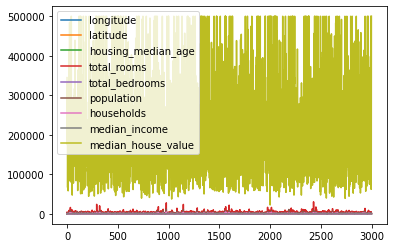

In [99]:
pandas_df =  df6.toPandas()
pandas_df.plot()